# PCA plots  

#### R qqman vignette  

https://cran.r-project.org/web/packages/qqman/vignettes/qqman.html

#### Example of how to use `%%R` magics in Jupyter  

Other examples:  

https://dzone.com/articles/using-r-on-jupyternbspnotebook  

https://www.datacamp.com/community/blog/jupyter-notebook-r

https://anaconda.org/ijstokes/demonstrating-rpy2-and-rmagic/notebook 
https://rpy2.github.io/doc/latest/html/interactive.html 
https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d 

#### Imports & config

In [1]:
import rpy2

rpy2.__version__

'3.4.2'

In [2]:
import os
import pandas as pd
import warnings; warnings.simplefilter('ignore')

%config InlineBackend.figure_format ='retina'
%load_ext rpy2.ipython

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%R require(qqman)

R[write to console]: Loading required package: qqman

R[write to console]: 

R[write to console]: For example usage please run: vignette('qqman')

R[write to console]: 

R[write to console]: Citation appreciated but not required:

R[write to console]: Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.

R[write to console]: 



<rpy2.robjects.vectors.BoolVector object at 0x7ffe465f7740> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]

Specify Input & Output files

In [4]:
## input files
dir_gwas = '../data/gwas_plink'

vcf_extract = 'ieu-a-25_v2.vcf.extracted.gwas'
plink_assoc = 'ieu-a-25_v2.assoc'
plink_logistic = 'ieu-a-25_v2.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_r_qqman'

In [5]:
gwas_file_vcf = os.path.join(dir_gwas, vcf_extract)
plot_prefix_vcf = os.path.join(dir_plot, vcf_extract)


gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

#### read in file --> pandas DF

In [6]:
df_assoc = pd.read_csv(gwas_file_assoc, header=0, delim_whitespace=True)

df_assoc.head()
df_assoc.dtypes

CHR                      SNP         BP A1  F_A  F_U A2  CHISQ        P  \
0    1    1_120437718_rs2793823  120437718  A  0.0  0.0  G    0.0  0.00140   
1    1    1_120437884_rs2641348  120437884  G  0.0  0.0  A    0.0  0.00110   
2    1  1_120438577_rs147294252  120438577  A  0.0  0.0  G    0.0  0.25000   
3    1    1_120439109_rs6668119  120439109  C  0.0  0.0  G    0.0  0.00073   
4    1    1_120440029_rs2027447  120440029  C  0.0  0.0  T    0.0  0.00068   

         OR  
0  0.059212  
1  0.064851  
2  0.123986  
3  0.068593  
4  0.067659

CHR        int64
SNP       object
BP         int64
A1        object
F_A      float64
F_U      float64
A2        object
CHISQ    float64
P        float64
OR       float64
dtype: object

In [7]:
df_assoc['P'].min()
df_assoc['P'].max()

df_assoc[df_assoc['P'].isnull()]

3.019951720402044e-122

1.0

Empty DataFrame
Columns: [CHR, SNP, BP, A1, F_A, F_U, A2, CHISQ, P, OR]
Index: []

In [8]:
%%R -i df_assoc 

manhattan(df_assoc)

In [9]:
%R head(gwasResults)

SNP  CHR  BP         P
1  rs1    1   1  0.914806
2  rs2    1   2  0.937075
3  rs3    1   3  0.286140
4  rs4    1   4  0.830448
5  rs5    1   5  0.641746
6  rs6    1   6  0.519096

In [10]:
df = pd.read_csv(gwas_file_vcf, header=0, delim_whitespace=True)

df.head()

CHROM        POS           ID REF ALT QUAL FILTER      INFO  \
0      1  120437718    rs2793823   G   A    .   PASS  AF=0.132   
1      1  120437884    rs2641348   A   G    .   PASS   AF=0.11   
2      1  120438577  rs147294252   G   A    .   PASS  AF=0.006   
3      1  120439109    rs6668119   G   C    .   PASS  AF=0.106   
4      1  120440029    rs2027447   T   C    .   PASS   AF=0.11   

              FORMAT                                           ieu-a-25  ...  \
0  ES:SE:LP:AF:SS:ID  0.0592119:0.0185129:2.85387:0.132:73902.3:rs27...  ...   
1  ES:SE:LP:AF:SS:ID  0.064851:0.0200746:2.95861:0.11:73902.3:rs2641348  ...   
2  ES:SE:LP:AF:SS:ID  0.123986:0.108496:0.60206:0.006:67530.5:rs1472...  ...   
3  ES:SE:LP:AF:SS:ID  0.0685928:0.0202474:3.13668:0.106:73902.3:rs66...  ...   
4  ES:SE:LP:AF:SS:ID  0.0676586:0.0200183:3.16749:0.11:73902.3:rs202...  ...   

        SS        OR    NMISS  F_A  F_U  CHISQ  TEST  STAT  \
0  73902.3  0.059212  73902.3  0.0  0.0    0.0   ADD   0.0   
1  73902.3  0.064851  73902.3  0.0  0.0    0.0   ADD   0.0   
2  67530.5  0.123986  67530.5  0.0  0.0    0.0   ADD   0.0   
3  73902.3  0.068593  73902.3  0.0  0.0    0.0   ADD   0.0   
4  73902.3  0.067659  73902.3  0.0  0.0    0.0   ADD   0.0   

                       SNP        P  
0    1_120437718_rs2793823  0.00140  
1    1_120437884_rs2641348  0.00110  
2  1_120438577_rs147294252  0.25000  
3    1_120439109_rs6668119  0.00073  
4    1_120440029_rs2027447  0.00068  

[5 rows x 29 columns]

In [11]:
df.dtypes

CHROM         int64
POS           int64
ID           object
REF          object
ALT          object
QUAL         object
FILTER       object
INFO         object
FORMAT       object
ieu-a-25     object
idx           int64
CHR           int64
BP            int64
A1           object
A2           object
ES          float64
SE          float64
LP          float64
AF          float64
SS          float64
OR          float64
NMISS       float64
F_A         float64
F_U         float64
CHISQ       float64
TEST         object
STAT        float64
SNP          object
P           float64
dtype: object

In [12]:
df_1_10 = df.loc[df['CHR']<11, ['SNP', 'CHR', 'BP', 'P']].copy()

df_1_10b = df.loc[df['CHR']<11, ['ID', 'CHR', 'POS', 'P']].copy()

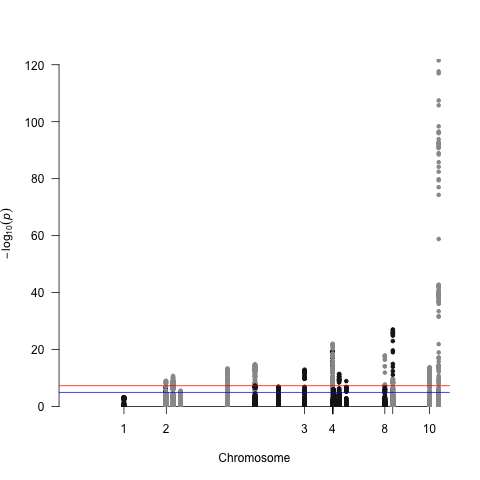

In [13]:
%%R -i df_1_10b

manhattan(df_1_10b, bp="POS", snp="ID")

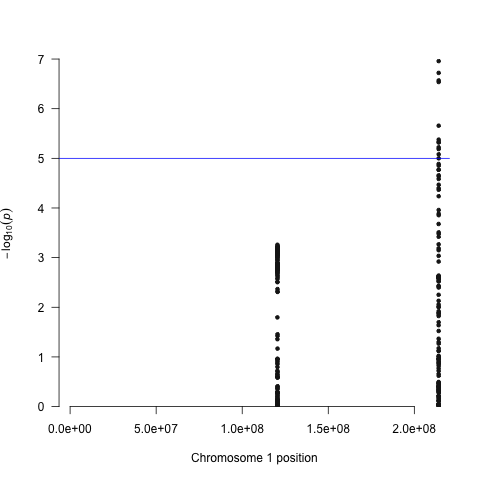

In [14]:
%%R -i df_1_10

manhattan(subset(df_1_10, CHR==1))

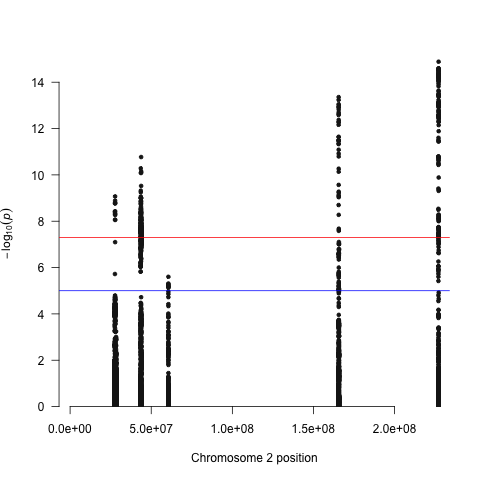

In [15]:
%%R -i df_1_10

manhattan(subset(df_1_10, CHR==2))

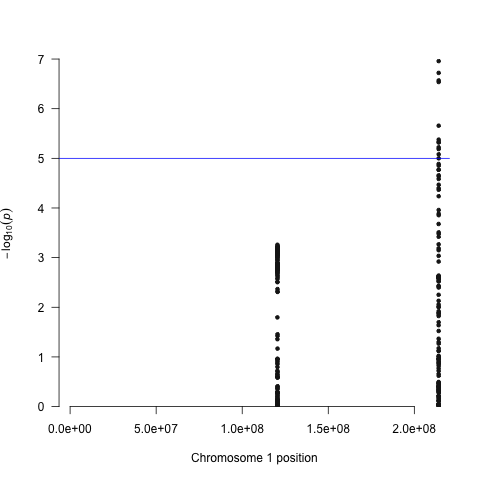

In [16]:
%%R -i df_1_10

manhattan(subset(df_1_10, CHR==1))

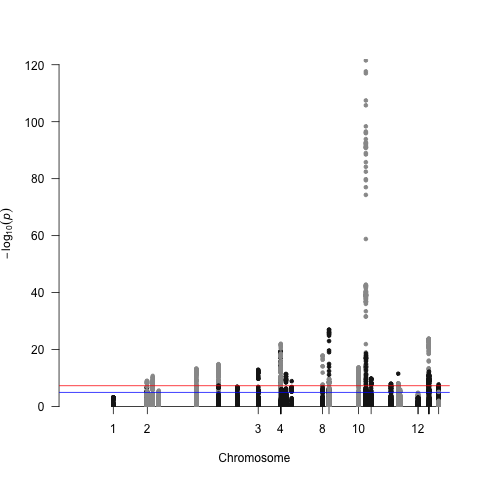

In [17]:
%%R -i df

manhattan(df, chr="CHROM", bp="POS", snp="ID", p="P")

In [18]:
_s_bp = df['BP'].copy().sort_values()
_s_bp.head()
_s_bp.tail()

25140    2443938
25141    2444094
25142    2444732
25143    2445805
25144    2446142
Name: BP, dtype: int64

7774    227188626
7775    227189955
7776    227190180
7777    227190317
7778    227190673
Name: BP, dtype: int64

In [19]:
df['BP'] = df['POS'].copy().astype('int')

In [20]:
df['P'].min()
df['P'].max()

df[df['P'].isnull()]

3.019951720402044e-122

1.0

Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT, QUAL, FILTER, INFO, FORMAT, ieu-a-25, idx, CHR, BP, A1, A2, ES, SE, LP, AF, SS, OR, NMISS, F_A, F_U, CHISQ, TEST, STAT, SNP, P]
Index: []

[0 rows x 29 columns]

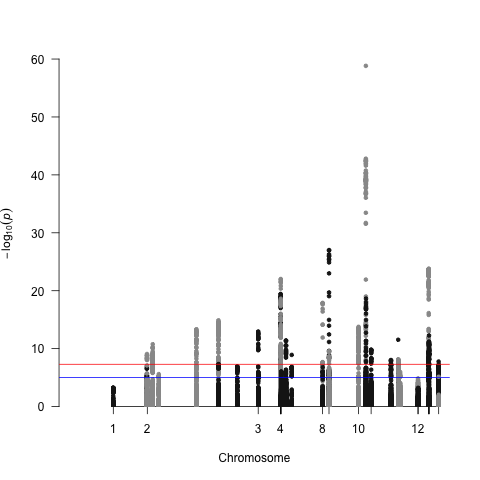

In [21]:
%%R -i df

manhattan(df, ylim=c(0,60))

In [22]:
df_plot = df[['SNP', 'CHR', 'BP', 'P']].copy()

df_plot.head()
df_plot.tail()

SNP  CHR         BP        P
0    1_120437718_rs2793823    1  120437718  0.00140
1    1_120437884_rs2641348    1  120437884  0.00110
2  1_120438577_rs147294252    1  120438577  0.25000
3    1_120439109_rs6668119    1  120439109  0.00073
4    1_120440029_rs2027447    1  120440029  0.00068

SNP  CHR        BP      P
42084    20_43057820_rs6031601   20  43057820  0.950
42085  20_43057831_rs112600410   20  43057831  0.039
42086   20_43058012_rs74173201   20  43058012  0.410
42087    20_43058018_rs3746574   20  43058018  0.750
42088    20_43058096_rs3746575   20  43058096  0.920

In [23]:
df_plot_10_20 = df_plot[df_plot['CHR']>9].copy()

df_plot_10_20.shape
df_plot_10_20.head()
df_plot_10_20.tail()

(19222, 4)

SNP  CHR        BP         P
22867   10_12160445_rs61274534   10  12160445  0.140000
22868   10_12160498_rs35386608   10  12160498  0.780001
22869  10_12160531_rs111729052   10  12160531  0.750000
22870   10_12160572_rs11257542   10  12160572  0.730000
22871  10_12160590_rs182114593   10  12160590  0.020000

SNP  CHR        BP      P
42084    20_43057820_rs6031601   20  43057820  0.950
42085  20_43057831_rs112600410   20  43057831  0.039
42086   20_43058012_rs74173201   20  43058012  0.410
42087    20_43058018_rs3746574   20  43058018  0.750
42088    20_43058096_rs3746575   20  43058096  0.920

In [24]:
df['CHR'].unique()

df['CHROM'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

In [25]:
df_plot_10_20['CHR'].unique()

array([10, 11, 12, 15, 16, 17, 18, 19, 20])

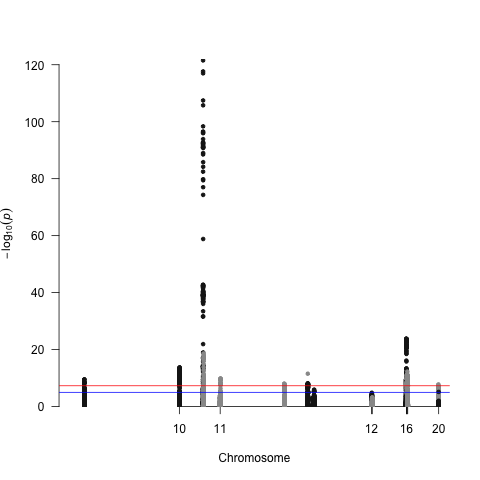

In [26]:
%%R -i df_plot_10_20

manhattan(df_plot_10_20, chr="CHR", bp="BP", snp="SNP", p="P", chrlabs = c(10,11,12,13,14,15,16,17,18,19,20))

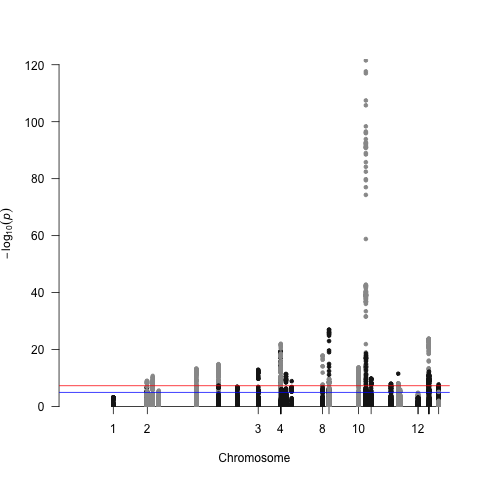

In [27]:
%%R -i df_plot 

manhattan(df_plot)

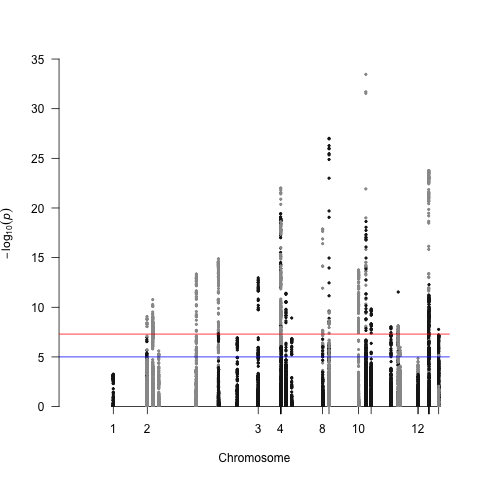

In [28]:
%%R -i df_plot 

manhattan(df_plot, cex=0.6, ylim=c(0,35), chrlabs = c(1:20))

<br>  

### manhattan plot looks strange - try to reformat SNP column to see if that helps?  



In [29]:
df2 = df_plot.copy()

df2[['_chr', '_pos', '_snp']] = df2['SNP'].str.split('_', expand=True)

df2.shape
df2.head()

(42089, 7)

SNP  CHR         BP        P _chr       _pos  \
0    1_120437718_rs2793823    1  120437718  0.00140    1  120437718   
1    1_120437884_rs2641348    1  120437884  0.00110    1  120437884   
2  1_120438577_rs147294252    1  120438577  0.25000    1  120438577   
3    1_120439109_rs6668119    1  120439109  0.00073    1  120439109   
4    1_120440029_rs2027447    1  120440029  0.00068    1  120440029   

          _snp  
0    rs2793823  
1    rs2641348  
2  rs147294252  
3    rs6668119  
4    rs2027447

In [30]:
df2.dtypes

SNP      object
CHR       int64
BP        int64
P       float64
_chr     object
_pos     object
_snp     object
dtype: object

In [31]:
df2['_snp'].nunique()
df2.shape

42089

(42089, 7)

In [32]:
_uniq_idx = (df2['_snp'].unique())

# _uniq_idx

len(_uniq_idx)

df2[~df2['_snp'].isin(_uniq_idx)]

42089

Empty DataFrame
Columns: [SNP, CHR, BP, P, _chr, _pos, _snp]
Index: []

In [33]:
df2['SNP'] = df2['_snp'].copy()

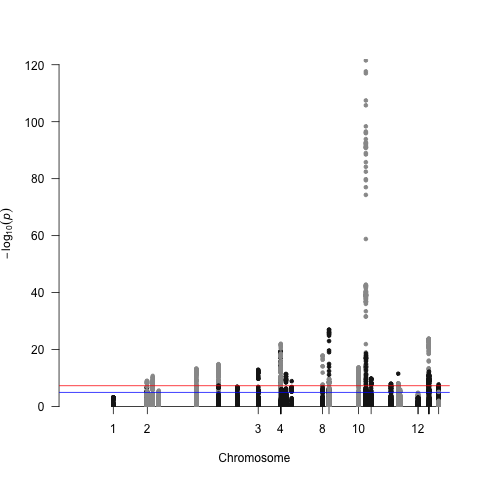

In [34]:
%%R -i df2 

manhattan(df2)

<br>  

### So the SNP column is not the cause...

In [35]:
df.dtypes

CHROM         int64
POS           int64
ID           object
REF          object
ALT          object
QUAL         object
FILTER       object
INFO         object
FORMAT       object
ieu-a-25     object
idx           int64
CHR           int64
BP            int64
A1           object
A2           object
ES          float64
SE          float64
LP          float64
AF          float64
SS          float64
OR          float64
NMISS       float64
F_A         float64
F_U         float64
CHISQ       float64
TEST         object
STAT        float64
SNP          object
P           float64
dtype: object

In [36]:
df['CHR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

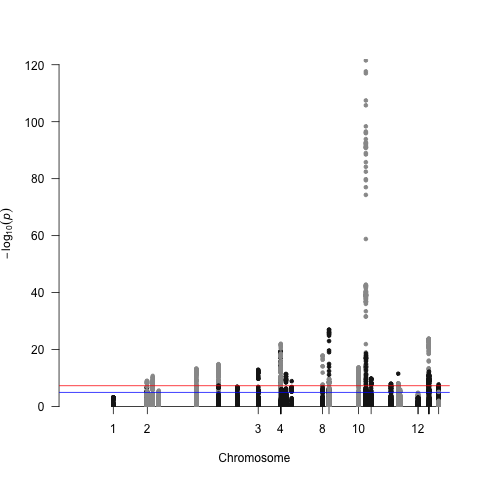

In [37]:
%%R -i df 

manhattan(df, chr='CHR')

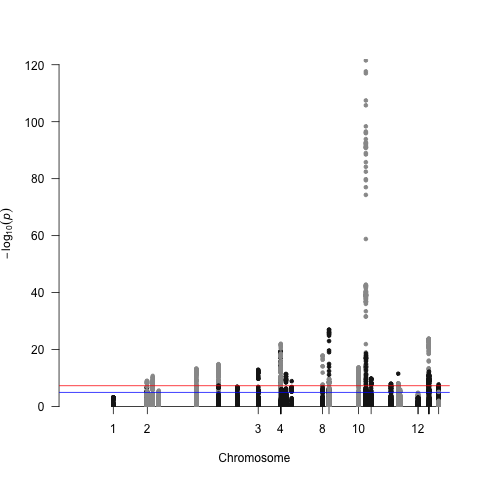

In [38]:
%%R -i df2 

manhattan(df2, chr='CHR', chrlabs = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

<br>  

### Try plotting logistic result instead?

In [39]:
df_logistic = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df_logistic.head()

CHR                      SNP         BP A1 TEST    NMISS        OR  \
0    1    1_120437718_rs2793823  120437718  A  ADD  73902.3  0.059212   
1    1    1_120437884_rs2641348  120437884  G  ADD  73902.3  0.064851   
2    1  1_120438577_rs147294252  120438577  A  ADD  67530.5  0.123986   
3    1    1_120439109_rs6668119  120439109  C  ADD  73902.3  0.068593   
4    1    1_120440029_rs2027447  120440029  C  ADD  73902.3  0.067659   

         SE  STAT        P  
0  0.018513   0.0  0.00140  
1  0.020075   0.0  0.00110  
2  0.108496   0.0  0.25000  
3  0.020247   0.0  0.00073  
4  0.020018   0.0  0.00068

In [40]:
df_logistic.dtypes
df_logistic['CHR'].unique()

CHR        int64
SNP       object
BP         int64
A1        object
TEST      object
NMISS    float64
OR       float64
SE       float64
STAT     float64
P        float64
dtype: object

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

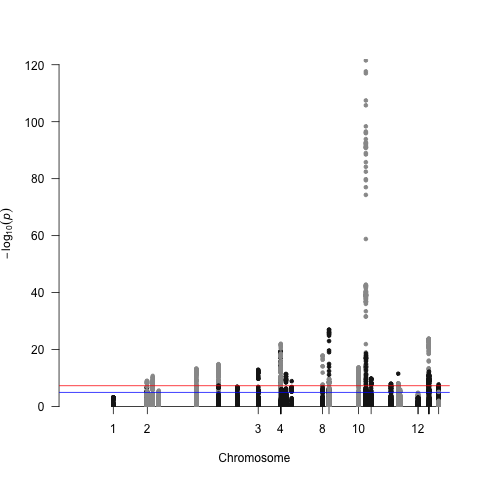

In [41]:
%%R -i df_logistic 

manhattan(df_logistic)

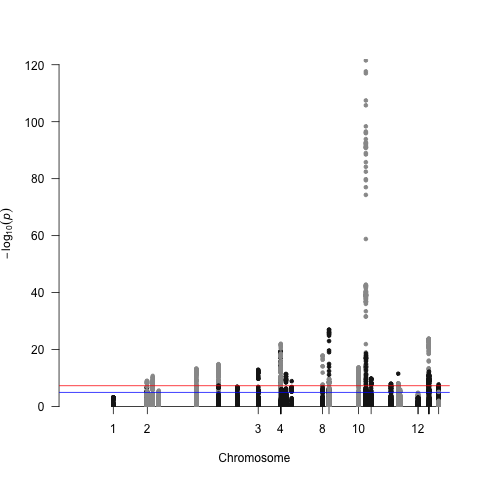

In [42]:
%%R -i df_logistic 

manhattan(df_logistic, chr="CHR", bp="BP", snp="SNP", p="P", chrlabs = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))